<a href="https://colab.research.google.com/github/SEBIN6/HR-Analytics---Predict-Employee-Attrition/blob/main/hr_data_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

In [ ]:
df = pd.read_csv('hr_data.csv')

In [ ]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

EDA: Visualize department-wise attrition

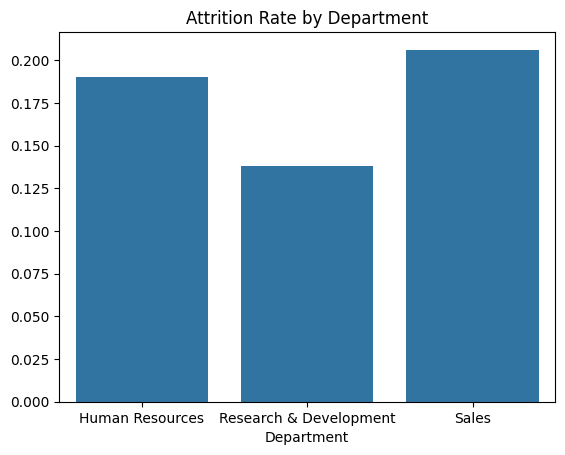

In [ ]:
attrition_rate = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean())
sns.barplot(x=attrition_rate.index, y=attrition_rate.values)
plt.title('Attrition Rate by Department')
plt.show()

Salary Band

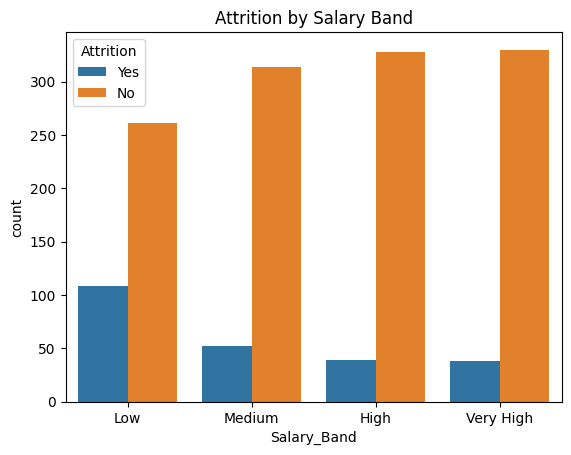

In [ ]:
df['Salary_Band'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.countplot(x='Salary_Band', hue='Attrition', data=df)
plt.title('Attrition by Salary Band')
plt.show()

Years Since Last Promotion vs Attrition

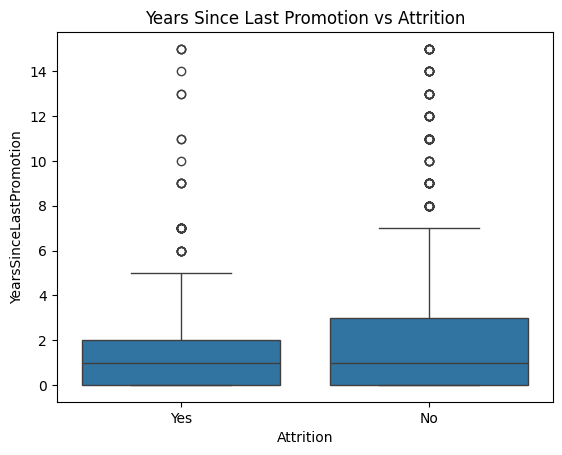

In [ ]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('Years Since Last Promotion vs Attrition')
plt.show()

Correlation Heatmap

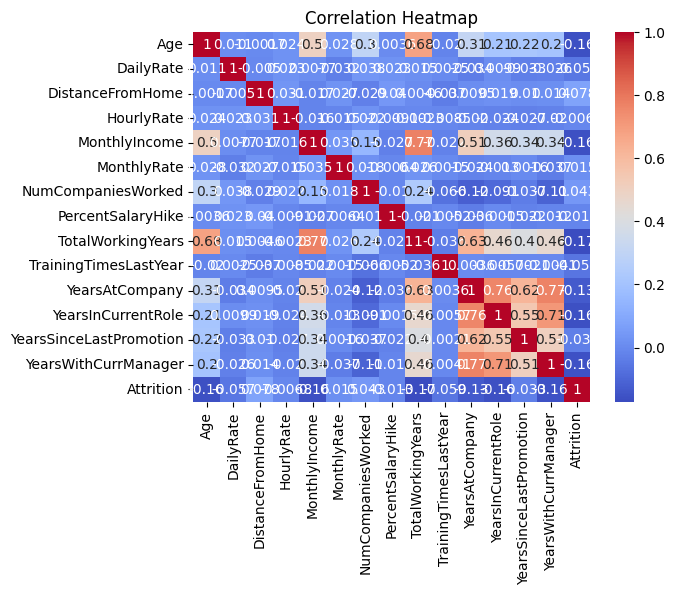

In [ ]:
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
corr = df[numerical_cols + ['Attrition']].copy()
corr['Attrition'] = corr['Attrition'].map({'Yes': 1, 'No': 0})
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
y = df['Attrition'].map({'Yes': 1, 'No': 0})
X = df.drop(['Attrition', 'Salary_Band'], axis=1)  # Drop Salary_Band as it's for visualization

Preproccesing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction']
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_preprocessed, y_train)


y_pred = model.predict(X_test_preprocessed)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8571428571428571
Confusion Matrix:
 [[236  19]
 [ 23  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       255
           1       0.46      0.41      0.43        39

    accuracy                           0.86       294
   macro avg       0.68      0.67      0.68       294
weighted avg       0.85      0.86      0.85       294



Summary Plot with Evalution

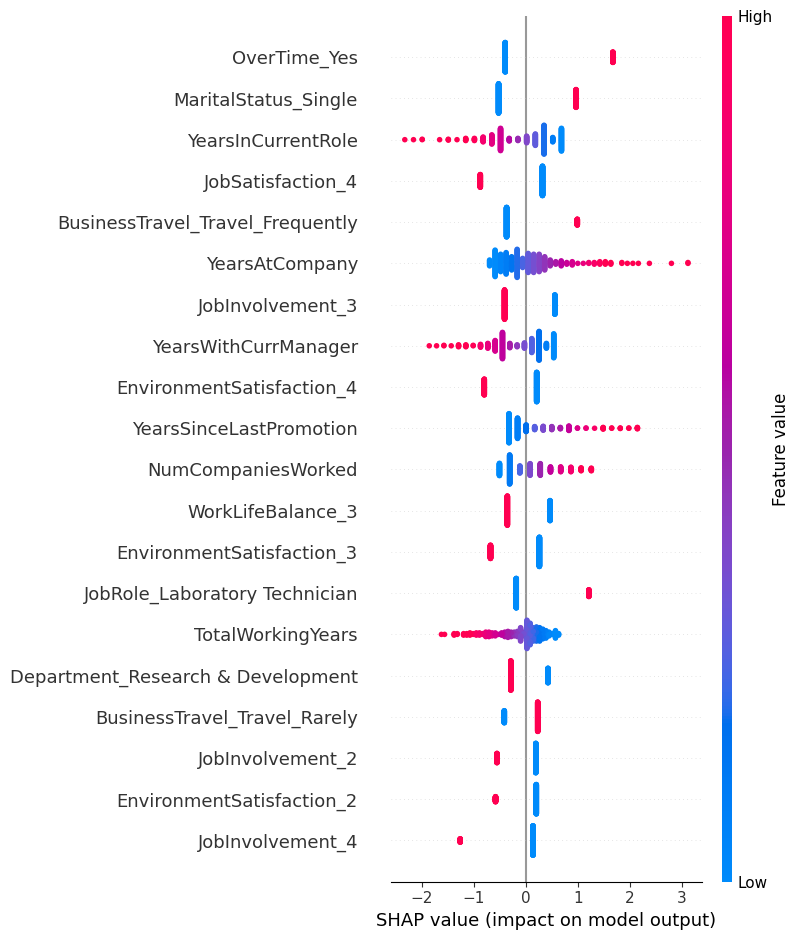

Decision Tree Accuracy: 0.8435374149659864
Confusion Matrix:
 [[242  13]
 [ 33   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.32      0.15      0.21        39

    accuracy                           0.84       294
   macro avg       0.60      0.55      0.56       294
weighted avg       0.81      0.84      0.82       294



In [ ]:
explainer = shap.LinearExplainer(model, X_train_preprocessed)
shap_values = explainer.shap_values(X_test_preprocessed)
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))


shap.summary_plot(shap_values, X_test_preprocessed, feature_names=feature_names)


tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train_preprocessed, y_train)

y_pred_tree = tree_model.predict(X_test_preprocessed)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


In [ ]:
tree_explainer = shap.TreeExplainer(tree_model)
tree_shap_values = tree_explainer.shap_values(X_test_preprocessed)

Summary Plot

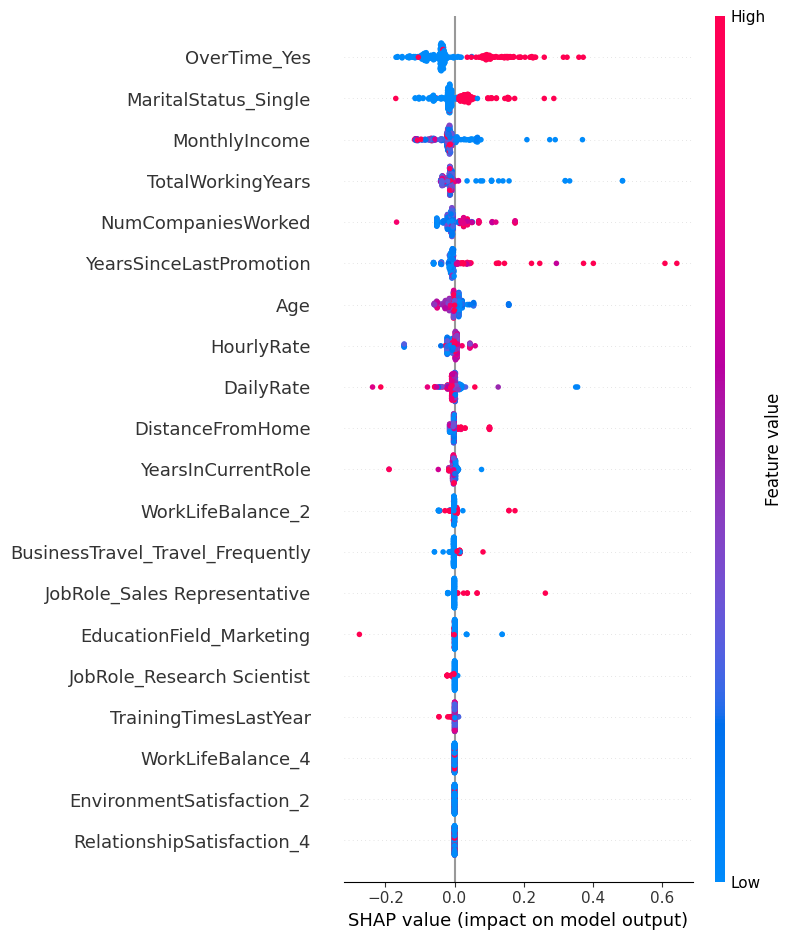

In [ ]:
shap.summary_plot(tree_shap_values[:, :, 1], X_test_preprocessed, feature_names=feature_names)

In [ ]:
df.to_csv('hr_processed.csv', index=False)

Model Accuracy

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("hr_processed.csv")  # Adjust path as needed


df_encoded = pd.get_dummies(df.drop("Attrition", axis=1), drop_first=True)


y = df["Attrition"].map({"Yes": 1, "No": 0})
X = df_encoded


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))




Model Accuracy: 0.86

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.44      0.18      0.25        39

    accuracy                           0.86       294
   macro avg       0.66      0.57      0.59       294
weighted avg       0.83      0.86      0.83       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confussion Matrix

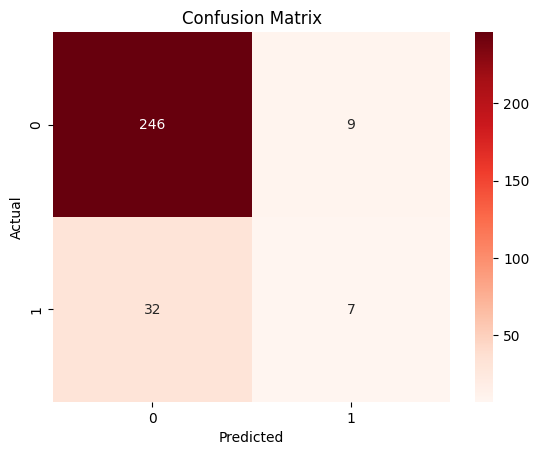

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()